In [26]:
# Importa as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Carregando Dados

In [3]:
# Carrega os dados
df = pd.read_csv('dataset.csv')

In [4]:
# Dimensões do DataFrame
df.shape

(9700, 11)

In [5]:
# Amostra dos dados
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [6]:
# Amostra dos dados
df.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


## Análise Exploratória

In [7]:
# Colunas
df.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [8]:
# Verifica o tipo de dado de cada coluna
df.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [9]:
# Resumo estatístico das vendas
df['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [10]:
# Verifica se tem algum dado duplicado
df[df.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [11]:
# Verifica se há algum valor ausente
df.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

### Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [12]:
# Filtra o DataFrame com os registros da categoria Office Supplies
df_p1 = df[df['Categoria'] == 'Office Supplies']

In [13]:
# Calcula o total de vendas em cada cidade
df_p1_total = df_p1.groupby('Cidade')['Valor_Venda'].sum()
df_p1_total.sort_values(ascending = False)

Cidade
New York City    68362.814
Los Angeles      47098.100
San Francisco    41771.198
Seattle          34856.878
Philadelphia     29313.687
                   ...    
Ormond Beach         2.808
Pensacola            2.214
Jupiter              2.064
Elyria               1.824
Abilene              1.392
Name: Valor_Venda, Length: 480, dtype: float64

In [14]:
# Encontra a cidade com maior valor de vendas
cidade_maior_venda = df_p1_total.idxmax()
cidade_maior_venda

'New York City'

In [15]:
print("A cidade com o maior valor de venda de produtos da categoria Office Supplies é", cidade_maior_venda)

A cidade com o maior valor de venda de produtos da categoria Office Supplies é New York City


### Qual o Total de Vendas Por Data do Pedido?

In [16]:
# Agrupa a data do pedido e o valor de vendas
# Calcula o total de vendas por data de pedido
df_p2 = df.groupby('Data_Pedido')['Valor_Venda'].sum()
df_p2.head()

Data_Pedido
01/01/2018    1481.8280
01/02/2015     468.9000
01/02/2017     161.9700
01/03/2015    2203.1510
01/03/2016    1642.1744
Name: Valor_Venda, dtype: float64

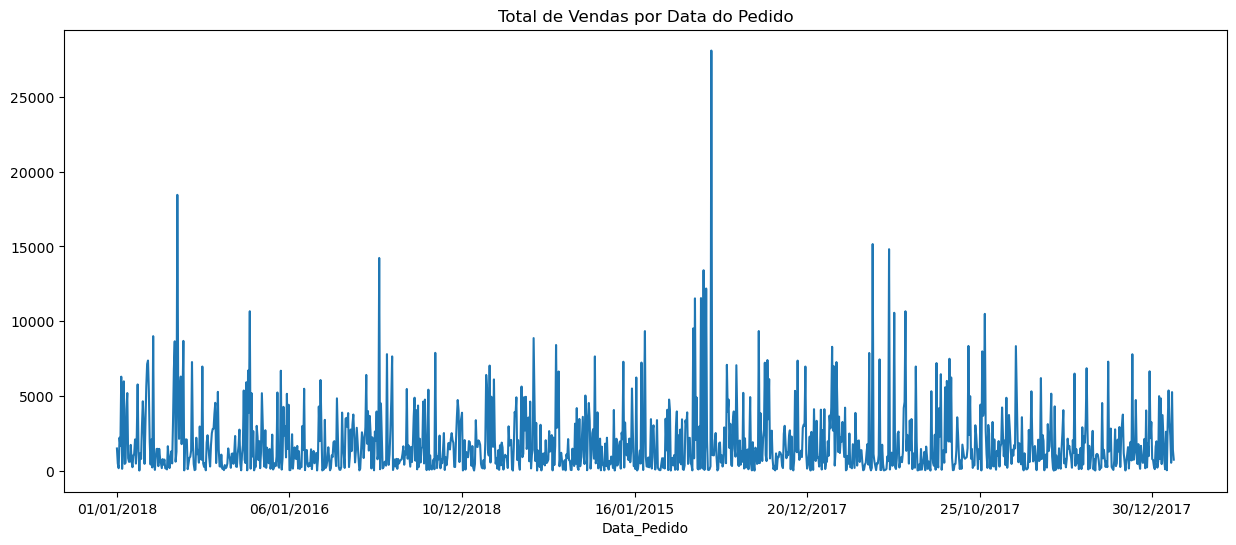

In [17]:
plt.figure(figsize = (15, 6))
df_p2.plot(x = 'Data_Pedido', y = 'Valor_Venda')
plt.title('Total de Vendas por Data do Pedido')
plt.show()

### Qual o Total de Vendas por Estado?

In [18]:
df_p3 = df.groupby('Estado')['Valor_Venda'].sum().reset_index()
df_p3.head()

,Estado,Valor_Venda
0,Alabama,19510.6400
1,Arizona,35272.6570
2,Arkansas,11673.8300
3,California,442927.0975
4,Colorado,31841.5980


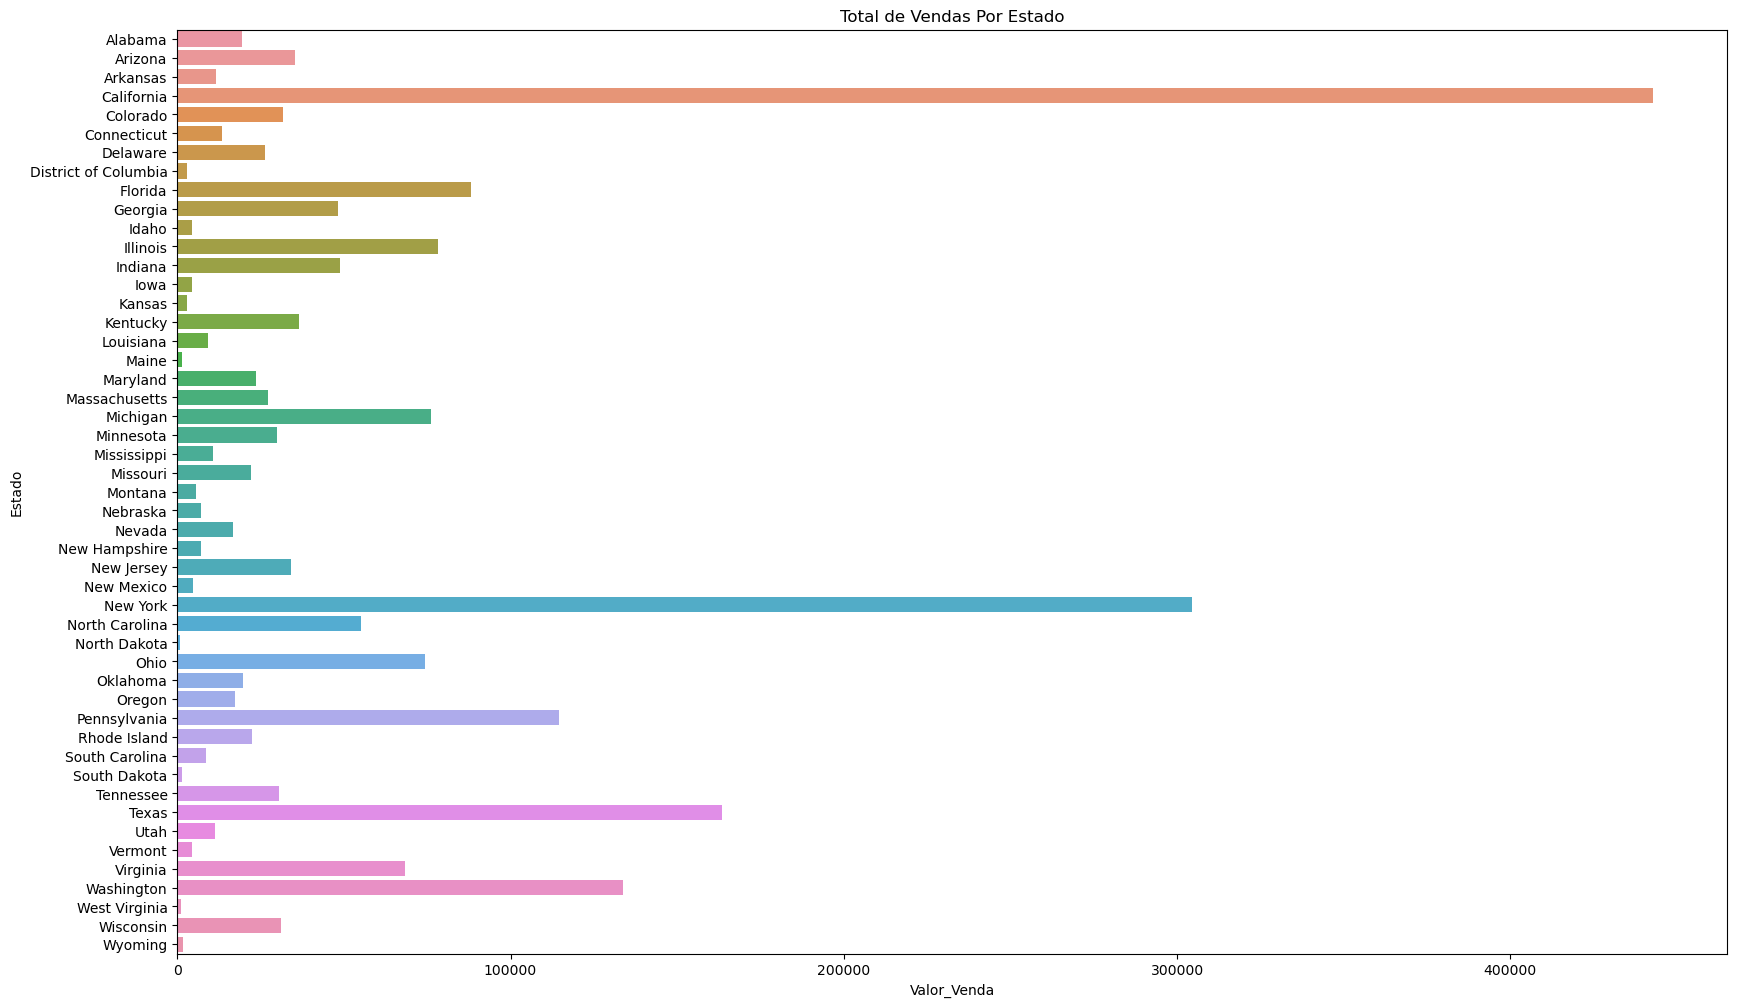

In [19]:
plt.figure(figsize = (20, 12))
sns.barplot(data = df_p3, 
            y = 'Estado', 
            x = 'Valor_Venda').set(title = 'Total de Vendas Por Estado')
plt.show()

### Quais São as 10 Cidades com Maior Total de Vendas?

In [20]:
df_p4 = df.groupby('Cidade')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda', ascending = False).head(10)
df_p4

,Cidade,Valor_Venda
327,New York City,251749.2190
265,Los Angeles,171654.6330
450,Seattle,114725.4780
436,San Francisco,107489.9520
372,Philadelphia,107197.8030
207,Houston,61590.1868
435,San Diego,47458.3790
80,Chicago,46974.3430
216,Jacksonville,44713.1830
123,Detroit,42446.9440


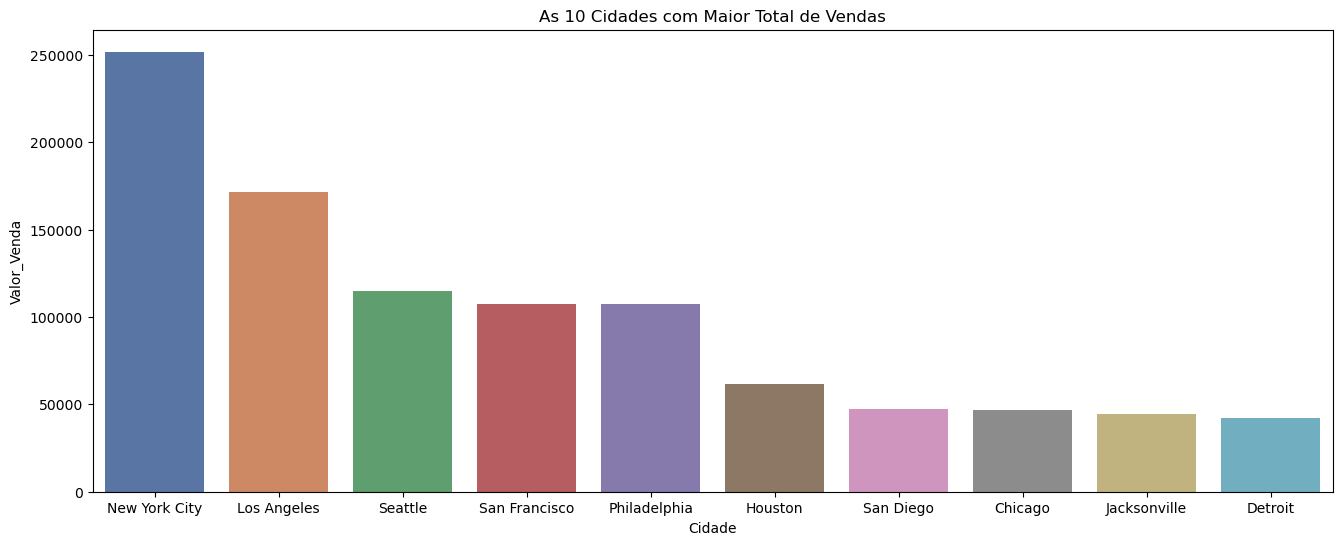

In [21]:
plt.figure(figsize = (16, 6))
sns.set_palette('deep')
sns.barplot(data = df_p4,
            y = 'Valor_Venda', 
            x = 'Cidade').set(title = 'As 10 Cidades com Maior Total de Vendas')
plt.show()

### Qual Segmento Teve o Maior Total de Vendas?

In [36]:
df_p5 = df.groupby('Segmento')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda', ascending = False)
total_vendas = df_p5['Valor_Venda'].sum()
df_p5

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


In [37]:
def autopct_format(values): 
    def my_format(pct): 
        total = sum(values) 
        val = int(round(pct * total / 100.0))
        return ' $ {v:d}'.format(v = val)
    return my_format

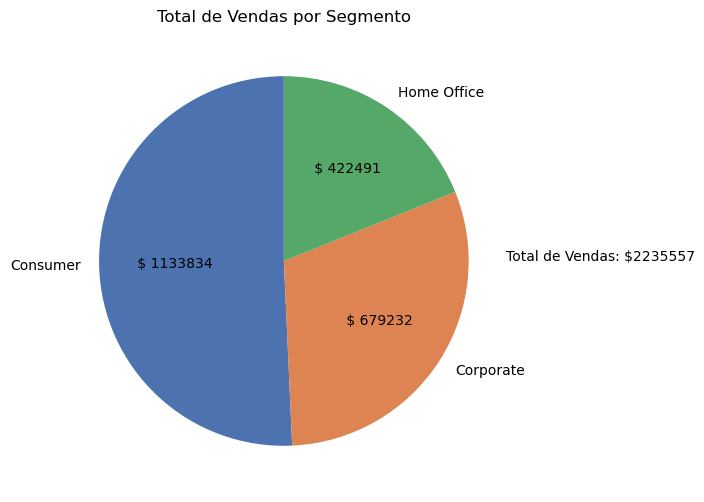

In [46]:
plt.figure(figsize = (16, 6))
plt.pie(df_p5['Valor_Venda'], 
        labels = df_p5['Segmento'], 
        autopct = autopct_format(df_p5['Valor_Venda']), 
        startangle = 90)
plt.annotate(text = 'Total de Vendas: ' + '$' + str(int(total_vendas)), xy = (1.2, 0))
plt.title('Total de Vendas por Segmento')
plt.show()